## Observations and Insights 

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [3]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
# mouse_metadata_df.head()

In [4]:
study_results_df = pd.read_csv(study_results_path)
# study_results_df.head()

In [5]:
# Combine the data into a single dataset
study_results = pd.merge(study_results_df, mouse_metadata_df, on='Mouse ID', how='left')
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the DataFrame.
mice_count=len(mouse_metadata_df['Mouse ID'].unique())
print(f"Total number of mice: {mice_count}")

Total number of mice: 249


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# duplicated(keep=False) --> marks all duplicate rows as Duplicates. 
# Other possible values for keep are 
#     - 'first' : Mark duplicates as 'True' except for the first occurrence.
#     - 'last' : Mark duplicates as 'True' except for the last occurrence.

duplicate_mouse_df = study_results[['Mouse ID', 'Timepoint']].loc[study_results[['Mouse ID', 'Timepoint']].duplicated(keep=False)]
duplicate_mouse_df = duplicate_mouse_df.drop_duplicates()
duplicate_mouse_df

# To check the unique list of Mouse IDs, uncomment below line
# (duplicate_mouse_df['Mouse ID'].unique())

,Mouse ID,Timepoint
107,g989,0
329,g989,5
620,g989,10
815,g989,15
950,g989,20


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 

# Requirement is to get all data for duplicate mouse ID, so using specific dataframe column 'Mouse ID' to get the list. 
#  This also helps in avoiding the duplicated Timeslot.  
duplicated_results_df = pd.merge(duplicate_mouse_df['Mouse ID'], study_results, on='Mouse ID', how='left')
duplicated_results_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,g989,0,45.000000,0,Propriva,Female,21,26
1,g989,0,45.000000,0,Propriva,Female,21,26
2,g989,5,48.786801,0,Propriva,Female,21,26
3,g989,5,47.570392,0,Propriva,Female,21,26
4,g989,10,51.745156,0,Propriva,Female,21,26
...,...,...,...,...,...,...,...,...
60,g989,20,55.326122,1,Propriva,Female,21,26
61,g989,20,54.657650,1,Propriva,Female,21,26
62,g989,25,56.045564,1,Propriva,Female,21,26
63,g989,30,59.082294,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# pd.options.display.max_rows = 1000
cleansed_study_results_df = study_results.loc[~study_results['Mouse ID'].isin((duplicate_mouse_df['Mouse ID'].unique()))]
cleansed_study_results_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [11]:
# Checking the number of mice in the clean DataFrame.
cleansed_mice_count=len(cleansed_study_results_df['Mouse ID'].unique())
print(f"Total number of mice: {cleansed_mice_count}")

Total number of mice: 248


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

aggregate_df=cleansed_study_results_df.groupby(by='Drug Regimen')
gb_mean_tumor_volume=aggregate_df['Tumor Volume (mm3)'].mean()
gb_median_tumor_volume=aggregate_df['Tumor Volume (mm3)'].median()
gb_variance_tumor_volume=aggregate_df['Tumor Volume (mm3)'].var()
gb_std_deviaton_tumor_volume=aggregate_df['Tumor Volume (mm3)'].std()
gb_sem_tumor_volume=aggregate_df['Tumor Volume (mm3)'].sem()

summary1_by_regimen_df = pd.DataFrame({
                                            "Mean": gb_mean_tumor_volume,
                                            "Median": gb_median_tumor_volume,
                                            "Variance": gb_variance_tumor_volume,
                                            "Standard Deviation": gb_std_deviaton_tumor_volume,
                                            "SEM (Standard Error of Mean)": gb_sem_tumor_volume
                                          })
summary1_by_regimen_df

,Mean,Median,Variance,Standard Deviation,SEM (Standard Error of Mean)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

summary2_by_regimen_df=(cleansed_study_results_df.groupby(by='Drug Regimen')['Tumor Volume (mm3)'].agg(["mean", "median", "var", "std", "sem"])
                                                .rename(columns = {"mean": "Mean",
                                                                  "median": "Median",
                                                                  "var": "Variance",
                                                                  "std": "Standard Deviation",
                                                                  "sem": "SEM (Standard Error of Mean)"
                                                      }))
summary2_by_regimen_df

,Mean,Median,Variance,Standard Deviation,SEM (Standard Error of Mean)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

In [53]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

aggregate_df=cleansed_study_results_df.groupby(by=['Timepoint', 'Drug Regimen'])
mice_count_per_timeslot = aggregate_df['Mouse ID'].count()
mice_count_per_timeslot
colors = ['blue','green','red','cyan','magenta','yellow','black','purple','olive','pink']

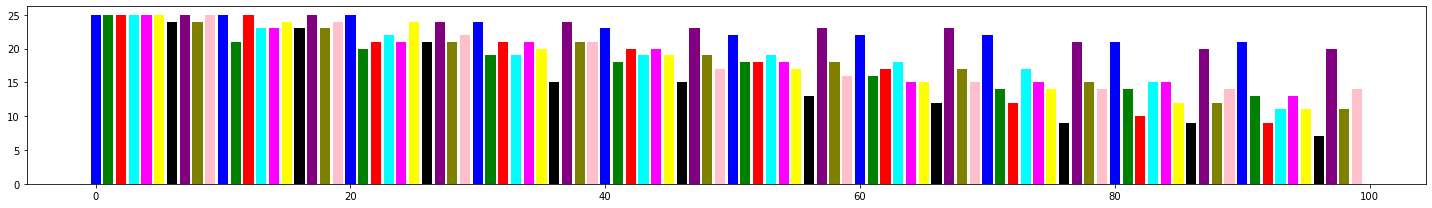

In [60]:
x_axis = np.arange(len(aggregate_df))
plt.figure(figsize=(20,3))
plt.bar(x_axis, mice_count_per_timeslot, color=colors)
# plt.title('Mice per Timepoint for each Drug regimen')
plt.tight_layout()
plt.show()

## Pie Plots

In [13]:
cleansed_study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


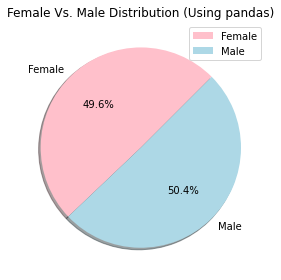

In [19]:
gender_summary_df = cleansed_study_results_df[['Mouse ID', 'Sex']].drop_duplicates().groupby(by='Sex').count()
gender_summary_df.rename(columns={'Mouse ID':'Mice Count'}, inplace=True)
colors=['pink','lightblue']

# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_summary_df.plot(kind='pie', y='Mice Count', autopct = "%1.1f%%",colors=colors, shadow=True, legend=True, 
                       rotatelabels=False, startangle=45, title="Female Vs. Male Distribution (Using pandas)").yaxis.set_visible(False)

plt.tight_layout()
plt.show()

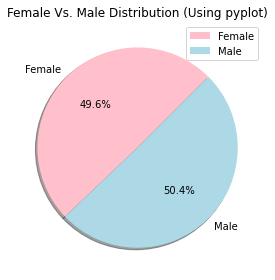

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
try:
    gender_summary_df = gender_summary_df.reset_index()
except ValueError:
    pass

labels = gender_summary_df['Sex']

sizes = gender_summary_df['Mice Count']
plt.pie(sizes, labels = labels, colors=colors, shadow=True, rotatelabels=False, autopct = "%1.1f%%", startangle=45)

plt.title("Female Vs. Male Distribution (Using pyplot)")

plt.legend()
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
cleansed_study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [22]:
# Assuming the criteria for four most promising treatment regimens as below:
# 1) Drugs used till max timepoint. 2) Most number of mice tested using the Drug

promising_drug_df = cleansed_study_results_df[cleansed_study_results_df['Timepoint'] == (cleansed_study_results_df['Timepoint'].max())]
promising_drug_df = (promising_drug_df[['Drug Regimen','Mouse ID']].groupby(by='Drug Regimen')
                                                                     .count()
                                                                     .rename(columns={'Mouse ID': 'count'})
                                                                     .reset_index()
                                                                     .sort_values(['count'], ascending=False)
                    )
four_sample_drug_regimens= promising_drug_df['Drug Regimen'].head(4).to_list()
four_sample_drug_regimens

['Capomulin', 'Ramicane', 'Zoniferol', 'Ceftamin']

In [23]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

four_samples=cleansed_study_results_df[cleansed_study_results_df['Drug Regimen'].isin(four_sample_drug_regimens)]
four_samples=four_samples.groupby(by='Mouse ID')['Timepoint'].max().reset_index()

four_sample_results = pd.merge(cleansed_study_results_df, four_samples, on=['Mouse ID', 'Timepoint'], how='inner')

# Calculate the final tumor volume of each mouse
four_sample_results.sort_values(by='Mouse ID').head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
84,a275,45,62.999356,3,Ceftamin,Female,20,28
72,a401,45,66.794156,4,Zoniferol,Female,8,25
40,a411,45,38.407618,1,Ramicane,Male,3,22
69,a444,45,43.047543,0,Ramicane,Female,10,25
85,a520,45,38.810366,1,Ramicane,Male,13,21


In [24]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

lowerq_list=[]
upperq_list=[]
iqr_list=[]
lower_bound_list=[]
upper_bound_list=[]
potential_outliers_list=[]
tumor_volume_list=[]

for drug_regimen in four_sample_drug_regimens:
        
    drug_sample = four_sample_results[four_sample_results['Drug Regimen'] == drug_regimen]
    quartiles = drug_sample['Tumor Volume (mm3)'].quantile(q=[0.25, 0.5, 0.75])
    
    # quartiles
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lowerq_list.append(lowerq)
    upperq_list.append(upperq)
    iqr_list.append(iqr)
    
    print(f"Drug {drug_regimen}")
    print(f"\t Lower quartile of tumor volume is: {lowerq}")
    print(f"\t Upper quartile of tumor volume is: {upperq}")
    print(f"\t Interquartile range of tumor volume is: {iqr}")

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    lower_bound_list.append(lower_bound)
    upper_bound_list.append(upper_bound)
    
    print(f"\t Values below {lower_bound} could be outliers.")
    print(f"\t Values above {upper_bound} could be outliers.")

    tumor_volume_list.append(drug_sample['Tumor Volume (mm3)'])
#     print(potential_outlier)
    
#     if ((potential_outlier < lower_bound) | (potential_outlier > upper_bound)):
#         potential_outliers_list.append(potential_outlier)
        
#     if (potential_outlier < lower_bound):
#         print("outlier {potential_outlier)")

#     if (potential_outlier > upper_bound):
#         print("outlier {potential_outlier)")        

Drug Capomulin
	 Lower quartile of tumor volume is: 32.37735684
	 Upper quartile of tumor volume is: 40.1592203
	 Interquartile range of tumor volume is: 7.781863460000004
	 Values below 20.70456164999999 could be outliers.
	 Values above 51.83201549 could be outliers.
Drug Ramicane
	 Lower quartile of tumor volume is: 31.56046955
	 Upper quartile of tumor volume is: 40.65900627
	 Interquartile range of tumor volume is: 9.098536719999998
	 Values below 17.912664470000003 could be outliers.
	 Values above 54.30681135 could be outliers.
Drug Zoniferol
	 Lower quartile of tumor volume is: 49.98830246
	 Upper quartile of tumor volume is: 66.79415599
	 Interquartile range of tumor volume is: 16.805853529999993
	 Values below 24.77952216500001 could be outliers.
	 Values above 92.00293628499998 could be outliers.
Drug Ceftamin
	 Lower quartile of tumor volume is: 48.72207785
	 Upper quartile of tumor volume is: 64.29983003
	 Interquartile range of tumor volume is: 15.577752179999997
	 Values

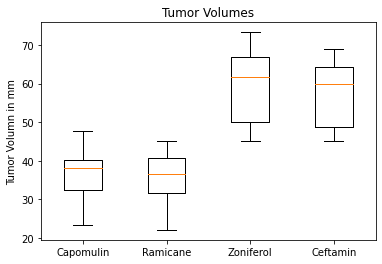

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.title('Tumor Volumes')
plt.ylabel(ylabel='Tumor Volumn in mm')
plt.boxplot(tumor_volume_list, labels=four_sample_drug_regimens)
plt.show()

## Line and Scatter Plots

In [26]:
# Data selection for Line and Scatter plots. 
#  Using variables to have flexibility in choosing a Drug Regimen or Mouse ID.

chosen_drug_regimen = 'Capomulin'
chosen_mouse_id = 'b128'

In [29]:
# Data for Line plot
chosen_line_results=cleansed_study_results_df[(cleansed_study_results_df['Drug Regimen']==chosen_drug_regimen) & (cleansed_study_results_df['Mouse ID']==chosen_mouse_id)]
chosen_line_results

# To see number of results the selected mouse has, uncomment below line else leave it commented.
# chosen_line_results['Mouse ID'].value_counts()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
679,b128,10,43.270852,0,Capomulin,Female,9,22
719,b128,15,43.784893,0,Capomulin,Female,9,22
933,b128,20,42.731552,0,Capomulin,Female,9,22
1268,b128,25,43.262145,1,Capomulin,Female,9,22
1400,b128,30,40.605335,1,Capomulin,Female,9,22
1547,b128,35,37.967644,1,Capomulin,Female,9,22
1629,b128,40,38.379726,2,Capomulin,Female,9,22
1764,b128,45,38.982878,2,Capomulin,Female,9,22


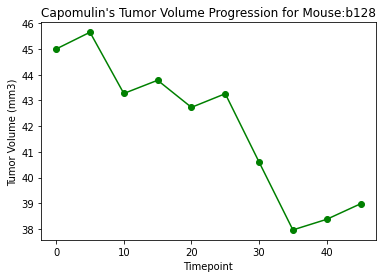

In [30]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

x_axis=chosen_line_results['Timepoint']
y_axis=chosen_line_results['Tumor Volume (mm3)']

plt.plot(x_axis,y_axis, marker='o',color='green')
plt.xlabel(xlabel='Timepoint')
plt.ylabel(ylabel='Tumor Volume (mm3)')
title_string = f"{chosen_drug_regimen}'s Tumor Volume Progression for Mouse:{chosen_mouse_id}"
plt.title(title_string)

plt.show()

In [31]:
# Data for Scatter plot
aggregate_df=cleansed_study_results_df[cleansed_study_results_df['Drug Regimen']==chosen_drug_regimen].groupby(by='Mouse ID')
average_mouse_weight = aggregate_df['Weight (g)'].mean()
average_tumor_volume = aggregate_df['Tumor Volume (mm3)'].mean()

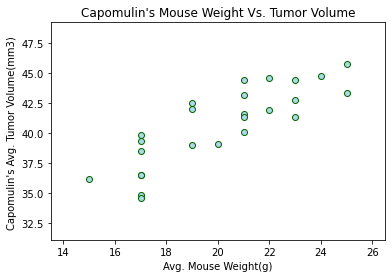

In [35]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

plt.scatter(x=average_mouse_weight,
           y=average_tumor_volume,
           edgecolors='darkgreen',
           facecolors='lightblue'
           )

plt.xlabel(xlabel='Avg. Mouse Weight(g)')
plt.ylabel(ylabel=f"{chosen_drug_regimen}'s Avg. Tumor Volume(mm3) ")

min_x_value = min(average_mouse_weight)
max_x_value = max(average_mouse_weight)
x_padding=min_x_value*.1
plt.xlim((min_x_value-x_padding), (max_x_value+x_padding))

min_y_value = min(average_tumor_volume)
max_y_value = max(average_tumor_volume)

y_padding=min_y_value*.1
plt.ylim((min_y_value-y_padding), (max_y_value+y_padding))

plt.title(f"{chosen_drug_regimen}'s Mouse Weight Vs. Tumor Volume")
plt.show()

## Correlation and Regression

In [82]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation=st.pearsonr(average_mouse_weight,average_tumor_volume)

# Correlation
print(f"""The correlation coefficient for average mouse weight and tumor volume for\
 {chosen_drug_regimen} is {round(correlation[0],2)}""")

The correlation coefficient for average mouse weight and tumor volume for Capomulin is 0.84


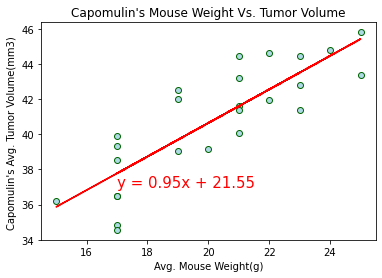

The r-squared is : 0.7088568047708723


In [83]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(average_mouse_weight, average_tumor_volume)
regress_values = average_mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x=average_mouse_weight,
           y=average_tumor_volume,
           edgecolors='darkgreen',
           facecolors='lightblue'
           )
plt.xlabel(xlabel='Avg. Mouse Weight(g)')
plt.ylabel(ylabel=f"{chosen_drug_regimen}'s Avg. Tumor Volume(mm3) ")
plt.title(f"{chosen_drug_regimen}'s Mouse Weight Vs. Tumor Volume")

plt.plot(average_mouse_weight,regress_values,color='red')
plt.annotate(line_eq,(17,37), fontsize=15,color='red')
plt.show()

print(f"The r-squared is : {rvalue**2}")